In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolov2.weights',
    'threshold': 0.3,
}

tfnet = TFNet(options)

/home/nikhil/Desktop/organized-work/Internship/geekyb/darkflow-master/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.09334182739257812s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bn

In [3]:
img = cv2.imread('cars.jpg')
result = tfnet.return_predict(img)

result

[{'bottomright': {'x': 544, 'y': 237},
  'confidence': 0.36436892,
  'label': 'car',
  'topleft': {'x': 59, 'y': 105}},
 {'bottomright': {'x': 125, 'y': 203},
  'confidence': 0.35392052,
  'label': 'car',
  'topleft': {'x': 102, 'y': 181}},
 {'bottomright': {'x': 186, 'y': 197},
  'confidence': 0.30273384,
  'label': 'car',
  'topleft': {'x': 162, 'y': 179}},
 {'bottomright': {'x': 361, 'y': 221},
  'confidence': 0.6156644,
  'label': 'car',
  'topleft': {'x': 324, 'y': 200}},
 {'bottomright': {'x': 599, 'y': 321},
  'confidence': 0.44868448,
  'label': 'car',
  'topleft': {'x': 250, 'y': 114}},
 {'bottomright': {'x': 75, 'y': 242},
  'confidence': 0.41087112,
  'label': 'car',
  'topleft': {'x': 29, 'y': 216}},
 {'bottomright': {'x': 121, 'y': 241},
  'confidence': 0.73049325,
  'label': 'car',
  'topleft': {'x': 86, 'y': 218}},
 {'bottomright': {'x': 216, 'y': 250},
  'confidence': 0.39148152,
  'label': 'car',
  'topleft': {'x': 174, 'y': 219}},
 {'bottomright': {'x': 247, 'y': 260}

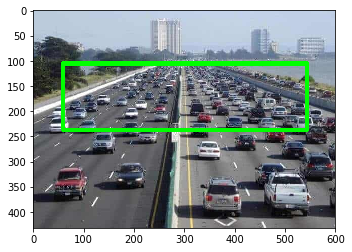

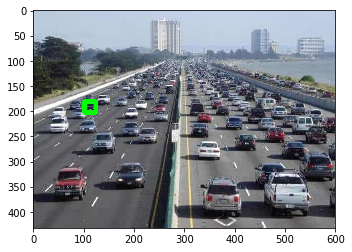

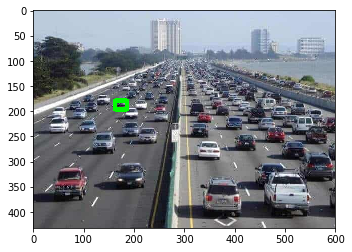

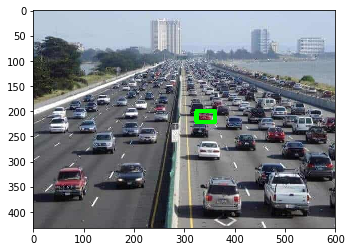

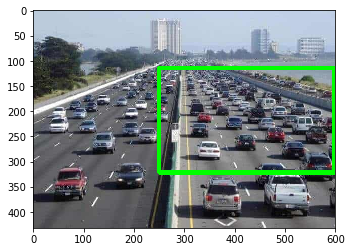

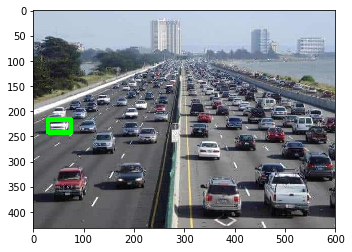

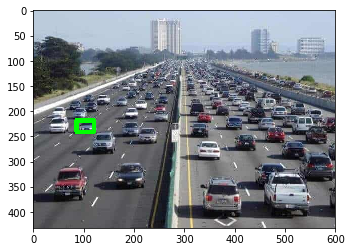

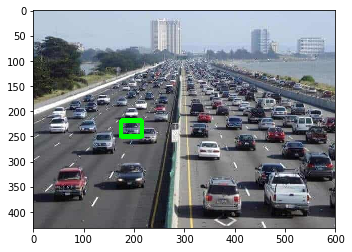

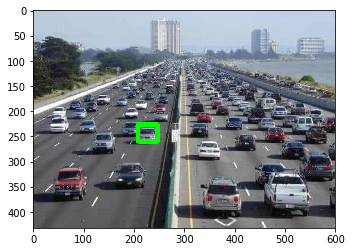

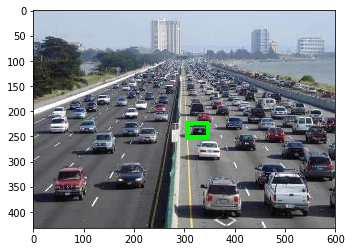

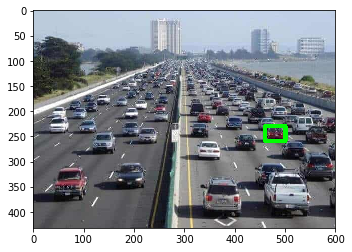

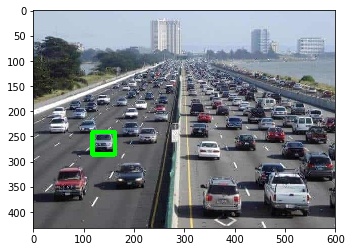

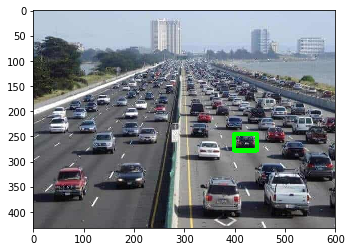

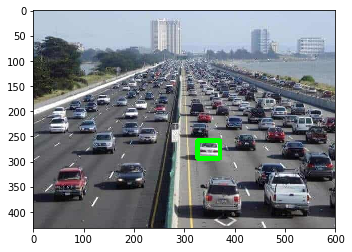

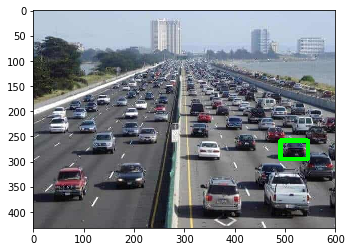

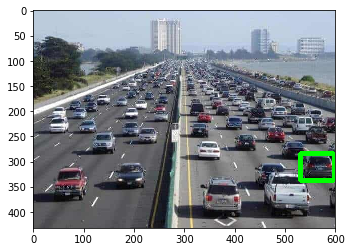

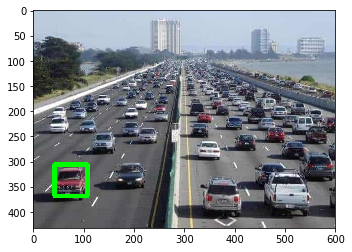

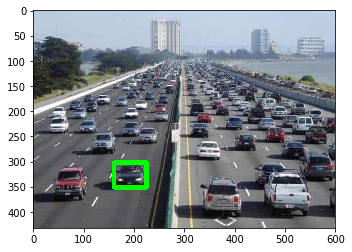

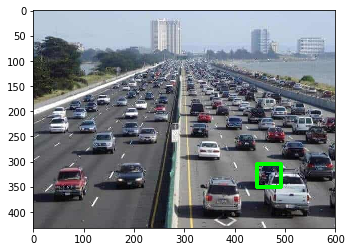

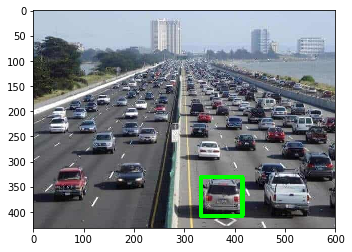

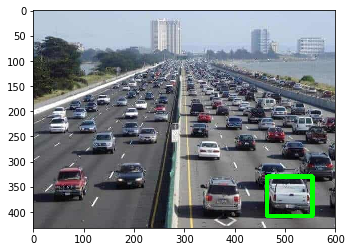

In [11]:
f = open("objects.txt", "w")

for obj in result:
    tl = (obj['topleft']['x'], obj['topleft']['y'])
    br = (obj['bottomright']['x'], obj['bottomright']['y'])
    
    height = obj['bottomright']['y'] - obj['topleft']['y']
    width = obj['bottomright']['x'] - obj['topleft']['x']
    
    label = obj['label']

    img = cv2.imread('cars.jpg')

    img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    f.write("Object detected: " + str(obj['label']) + "\n")
    f.write("Top Left coordinates: " + str(tl) + "\n")
    f.write("Bottom Right coordinates: " + str(br) + "\n")
    f.write("Height: " + str(height) + "\n")
    f.write("Width: " + str(width) + "\n")
    f.write("--------------------------------------------\n")
    
    plt.imshow(img)
    plt.show()
    
f.close()